<a href="https://colab.research.google.com/github/Kwangbin/statistic/blob/main/chap04.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 추측통계의 기본

## 모집단과 표본

400명 학생 시험

본인 점수 80점

등수를 모름

10명 또느 20명 만으로 자신의 성적을 추측 하라???
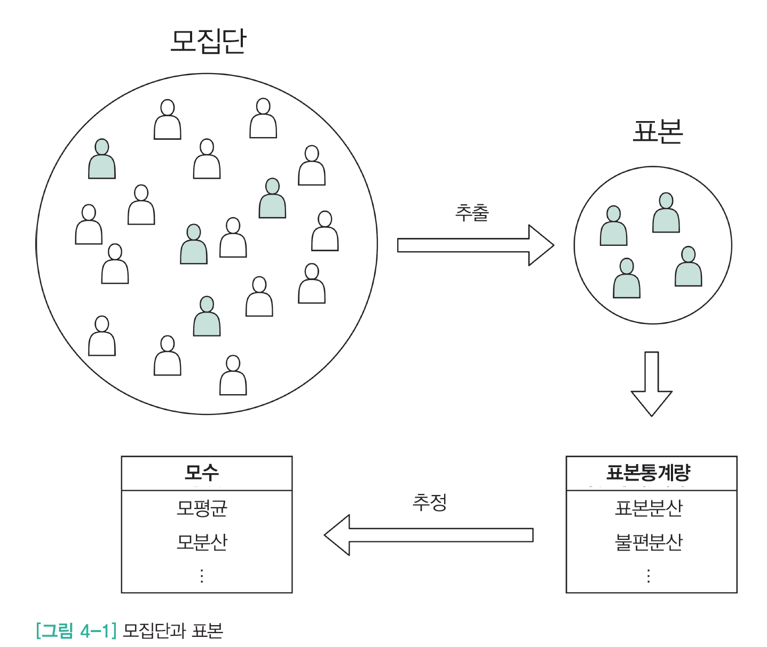

### 표본의 추출방법

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
cd drive/MyDrive/ml/statistic/

/content/drive/MyDrive/ml/statistic


In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%precision 3
%matplotlib inline

In [6]:
df = pd.read_csv('data/ch4_scores400.csv')
scores = np.array(df['score'])
scores[:10]

array([76, 55, 80, 80, 74, 61, 81, 76, 23, 80])

In [7]:
# 무작위 추출(임의 추출): 임의로 표본을 추출하는 방법
# 복원추출: 여러 차례 동일한 표본을 선택하는 방법

np.random.choice([1, 2, 3], 3)

array([2, 1, 1])

In [ ]:
#비복원추출: 동일한 표본은 한 번만 선택하는 방법

np.random.choice([1, 2, 3], 3, replace=False)

In [8]:
#시드를 0으로 하는 무작위 추출(임의 추출)은 매번 동일한 결과

np.random.seed(0)
np.random.choice([1, 2, 3], 3)

array([1, 2, 1])

In [9]:
#표본크기 20으로 복원추출, 표본 평균 계산

np.random.seed(0)
sample = np.random.choice(scores, 20)

sample.mean()

70.400

In [11]:
# 모평균은 69.530(score.mean())이므로 꽤 괜찮은 추측

scores.mean()

69.530

In [12]:
#무작위 추측은 실행할 때마다 결과가 달라지므로, 표본평균도 매번 달라짐

for i in range(5):
    sample = np.random.choice(scores, 20)
    print(f'{i+1}번째 무작위 추출로 얻은 표본평균', sample.mean())

1번째 무작위 추출로 얻은 표본평균 72.45
2번째 무작위 추출로 얻은 표본평균 63.7
3번째 무작위 추출로 얻은 표본평균 66.05
4번째 무작위 추출로 얻은 표본평균 71.7
5번째 무작위 추출로 얻은 표본평균 74.15


## 확률 모델

### 확률의 기본

확률 : 무작위 추출과 같은 불확정성을 수반한 현상을 해석

확률 모형 : 무작위 추출 혹은 주사위를 모델링

확률변수 : 결과를 알아맞힐 수는 없지만, 취하는 값과 그 값이 나올 확률이 결정되어 있는 것

시행 : 확률변수의 결과를 관측하는 것

실현값 : 시행에 의해 관측되는 값


### 확률분포

###사건 : 시행 결과로 나타날 수 있는 값(눈이 1, 눈이 홀수)

주사위의 눈은 확률 변수 X

눈이 1이 되는 사건의 확률

눈이 홀수인 사건의 확률


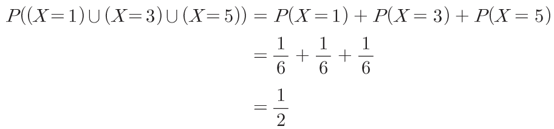


###근원사건 : 세부적으로 더 분해될 수 없는 사건(눈이 1)

상호배반 : 동시에 일어날 수 없는 사건

눈이 1 또는 2 또는 3’이라는 사건과 ’눈이 6’이라는 사건


In [15]:
dice = [1, 2, 3, 4, 5, 6]

#공정한 주사위 확률 분포
prob_T = [1/6, 1/6, 1/6, 1/6, 1/6, 1/6]

#불공정한 주사위 확률 분포
prob = [1/21, 2/21, 3/21, 4/21, 5/21, 6/21]

In [19]:
a=np.random.choice(dice, p=prob)
a

6

In [17]:
num_trial = 100
sample = np.random.choice(dice, num_trial, p=prob)
sample

array([4, 6, 4, 5, 5, 6, 6, 3, 5, 6, 5, 6, 6, 2, 3, 1, 6, 5, 6, 3, 4, 5,
       3, 4, 3, 5, 5, 4, 4, 6, 4, 6, 5, 6, 5, 4, 6, 2, 6, 4, 5, 3, 4, 6,
       5, 5, 5, 3, 4, 5, 4, 4, 6, 4, 4, 6, 6, 2, 2, 4, 5, 1, 6, 4, 3, 2,
       2, 6, 3, 5, 4, 2, 4, 4, 6, 6, 1, 5, 3, 6, 6, 4, 2, 1, 6, 4, 4, 2,
       4, 1, 3, 6, 6, 6, 4, 5, 4, 3, 3, 4])

In [20]:
freq, _ = np.histogram(sample, bins=6, range=(1, 7))
pd.DataFrame({'frequency':freq,
              'relative frequency':freq / num_trial},
              index = pd.Index(np.arange(1, 7), name='dice'))

,frequency,relative frequency
dice,,
1,5,0.05
2,9,0.09
3,13,0.13
4,27,0.27
5,19,0.19
6,27,0.27


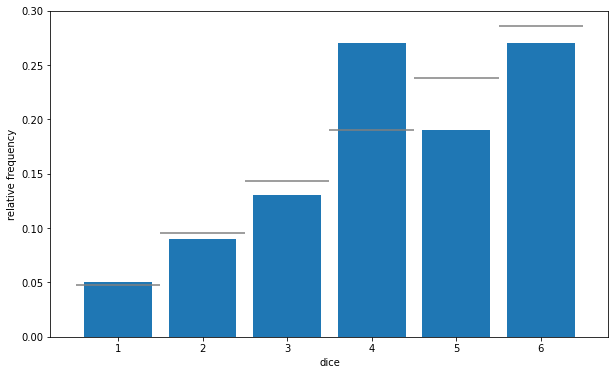

In [21]:
# 100번 시행했을 때 주사위 눙에 대한 히스토 그램

fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111)
ax.hist(sample, bins=6, range=(1, 7), density=True, rwidth=0.8)
# 실제의 확률분포를 가로선으로 표시
ax.hlines(prob, np.arange(1, 7), np.arange(2, 8), colors='gray')

# 막대 그래프의 [1.5, 2.5, ..., 6.5]에 눈금을 표시
ax.set_xticks(np.linspace(1.5, 6.5, 6))
# 주사위 눈의 값은 [1, 2, 3, 4, 5, 6]
ax.set_xticklabels(np.arange(1, 7))
ax.set_xlabel('dice')
ax.set_ylabel('relative frequency')
plt.show()

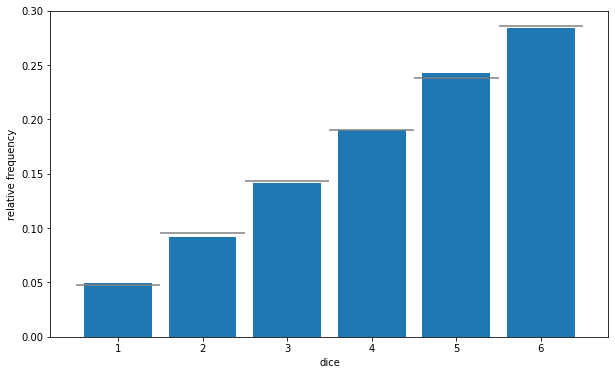

In [22]:
#10000번 시행했을 때의 히스토그램은 실제의 확률분포에 가까워짐

num_trial = 10000
sample = np.random.choice(dice, size=num_trial, p=prob)

fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111)
ax.hist(sample, bins=6, range=(1, 7), density=True, rwidth=0.8)
ax.hlines(prob, np.arange(1, 7), np.arange(2, 8), colors='gray')
ax.set_xticks(np.linspace(1.5, 6.5, 6))
ax.set_xticklabels(np.arange(1, 7))
ax.set_xlabel('dice')
ax.set_ylabel('relative frequency')
plt.show()

## 추측통계에서의 확률

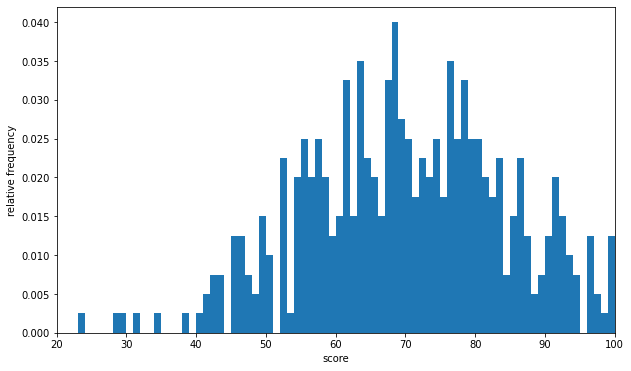

In [23]:
#계급 폭을 1점으로 하는 히스토 그램

fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111)
ax.hist(scores, bins=100, range=(0, 100), density=True)
ax.set_xlim(20, 100)
ax.set_ylim(0, 0.042)
ax.set_xlabel('score')
ax.set_ylabel('relative frequency')
plt.show()

In [ ]:
np.random.choice(scores)

63

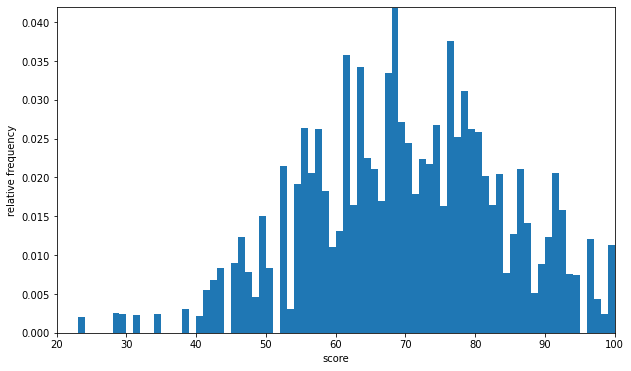

In [24]:
#69점을 얻은 학생은 전교생의 0.04(4%)이므로 무작위추출을 수행하면 4%의 확률로 69점이라는 표본 데이터 획득


sample = np.random.choice(scores, 10000)

fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111)
ax.hist(sample, bins=100, range=(0, 100), density=True)
ax.set_xlim(20, 100)
ax.set_ylim(0, 0.042)
ax.set_xlabel('score')
ax.set_ylabel('relative frequency')
plt.show()

In [25]:
#무작위추출은 확률분포를 따르는 확률변수의 시행

np.random.choice(scores)

96

시행 횟수를 늘리면 주사위의 상대도수는 실제의 확률분포에 가까워짐

무작위추출에서도 표본의 크기가 커지면, 표본 데이터의 상대도수는 실제의 확률분포에 근사

무작위추출로 샘플 사이즈가 10000인 표본 추출


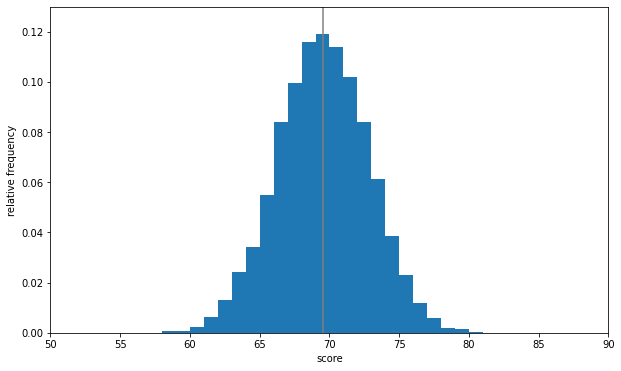

In [27]:
#표본크기가 20인 표본을 추출하여 표본평균을 계산하는 작업을 10000번 수행

sample_means = [np.random.choice(scores, 20).mean()
                for _ in range(10000)]

fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111)
ax.hist(sample_means, bins=100, range=(0, 100), density=True)
# 모평균을 세로선으로 표시
ax.vlines(np.mean(scores), 0, 1, 'gray')
ax.set_xlim(50, 90)
ax.set_ylim(0, 0.13)
ax.set_xlabel('score')
ax.set_ylabel('relative frequency')
plt.show()

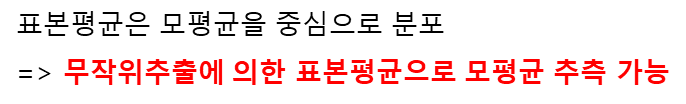

## 이제부터 배우는 것